In [1]:
import numpy as np, warnings
import sys; sys.path.append('./')
from data_loader import DataLoader
from scipy.special import psi, gamma
from scipy.misc import derivative
import os, tqdm, pickle
from numpy import typing as npt
from sim_base_model import SimBaseModel
import sim_models
import matplotlib.pyplot as plt
import seaborn as sns

# warnings.simplefilter('ignore')

In [2]:
E_min = 0.676 # MeV
E_max = 2.624 # MeV
which_data = 'som'

loader = DataLoader(E_min, E_max, which_data)
data = loader.get_data()
norm_grouping = loader.get_normalization_grouping()


# Set up the priors
param_bounds = np.array([[-0.02, 0.06], [-3, 3], [5.0, 25.0], [-6, 6], [5.0, 25.0], [-6, 6]])
params_prior = np.array([[0.025, 0.015], [0.8, 0.4], [13.84, 1.63], [0.0, 1.6], [12.59, 1.85], [0.0, 1.6]]) # center, width

gauss_prior_params = np.hstack([param_bounds, params_prior])
gauss_prior_f = loader.get_normalization_prior_info()

In [3]:
# Set up the base model
# model = sim_models.Sim_BS_C(data, norm_grouping, gauss_prior_params, gauss_prior_f, True)
model = sim_models.Sim_BS_C(data, norm_grouping, gauss_prior_params, gauss_prior_f, False)
test = np.concatenate([[1.0], [1.01], [0.0115, 0.8644, 15.0719, 1.9621, 13.3486, 1.0163], gauss_prior_f[:, 2]])
# model.log_posterior(test)

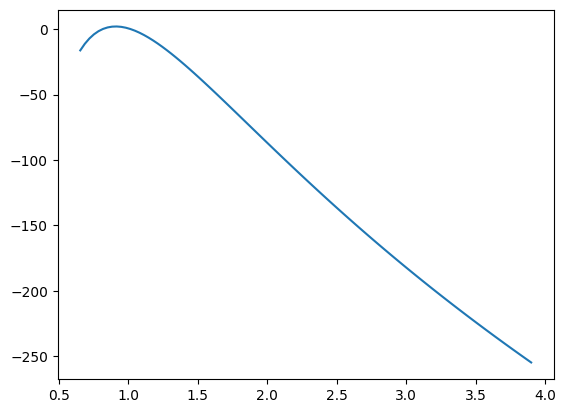

In [4]:
lambda_bs = np.linspace(np.max(model.Q_numerator) + 0.00001, 3.9, 100)
vals = []
for i in lambda_bs:
    parameters = np.concatenate([[1.0], [i], [0.0115, 0.8644, 15.0719, 1.9621, 13.3486, 1.0163], gauss_prior_f[:, 2]])
    # params = parameters[2:int(2 + model.erp_dim)]
    # model.y1s = model.cs_theory(params, order = 1)
    # model.y2s = model.cs_theory(params, order = 2)
    vals.append(model.log_posterior(parameters))

plt.plot(lambda_bs, vals)

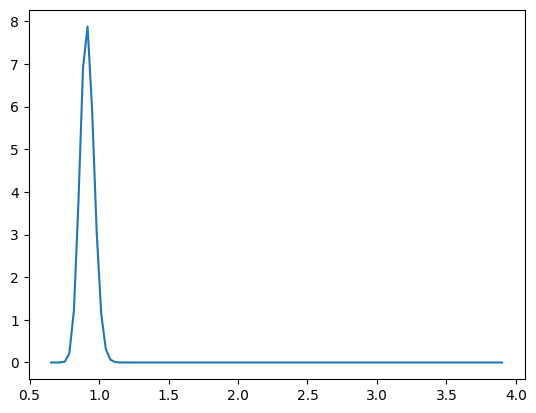

In [5]:
# plt.plot(lambda_bs, np.exp(vals - np.max(vals)))
plt.plot(lambda_bs, np.exp(vals))


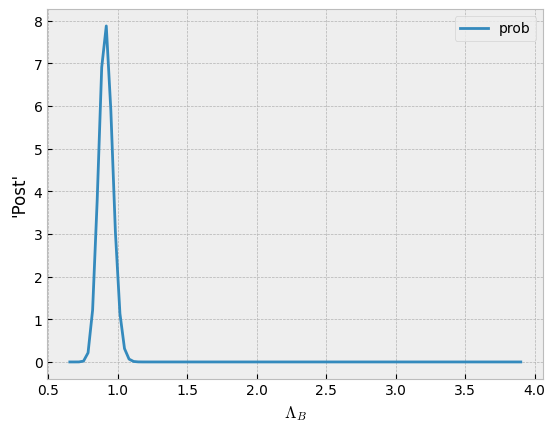

In [8]:
plt.style.use('bmh')

# plt.title('E_max = {} MeV, N_data: {}'.format(E_max, E_lab.shape[0]))
plt.ylabel('\'Post\'')
plt.xlabel('$\Lambda_{B}$')
plt.plot(lambda_bs, np.exp(vals), label = 'prob')
# plt.vlines(Lambda_Bs[np.where(probs == max(probs))], 0, max(probs) + 0.3, color = 'orange', label = '$\Lambda_B$ = {}'.format(Lambda_Bs[np.where(probs == max(probs))]))
plt.legend()

In [7]:
np.trapz(np.exp(vals), lambda_bs)

0.9999999990320594